ASSIGNMENT:What is happening with our sales and repayments?

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
#reading the file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/watu_sales_data.csv')
df.head()

,make,model,branch,date_of_sale,is_late_to_pay,payment_expected,payment_actual
0,Boxer,BM 150,Nairobi,2021-01-06,0,95394.0,95394.0
1,TVS,HLX 100CC ES PLUS,Bungoma,2021-04-22,0,102784.0,102784.0
2,TVS,HLX 100CC KS,Bungoma,2021-02-26,0,82295.0,82295.0
3,TVS,HLX 150CC (5 Gears),Nairobi,2021-03-26,0,93586.0,93586.0
4,TVS,HLX 150X (5 Gears),Mombasa,2021-06-05,0,135065.0,135065.0


DATA EXPLORATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              2000 non-null   object 
 1   model             2000 non-null   object 
 2   branch            2000 non-null   object 
 3   date_of_sale      2000 non-null   object 
 4   is_late_to_pay    2000 non-null   int64  
 5   payment_expected  2000 non-null   float64
 6   payment_actual    2000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 109.5+ KB


In [ ]:
#checking for null values
df.isnull().sum()

make                0
model               0
branch              0
date_of_sale        0
is_late_to_pay      0
payment_expected    0
payment_actual      0
dtype: int64

In [ ]:
df.describe()

,is_late_to_pay,payment_expected,payment_actual
count,2000.000000,2000.000000,2000.000000
mean,0.111000,100731.353000,91196.814500
std,0.314211,22531.377948,31563.563804
min,0.000000,800.000000,800.000000
25%,0.000000,86480.000000,79171.250000
50%,0.000000,102062.500000,96972.500000
75%,0.000000,114751.250000,111471.250000
max,1.000000,300050.000000,300050.000000


DATA ANALYSIS

In [ ]:
#Creating a new column 'repayment status'
df['repayment_status'] = np.where(df['is_late_to_pay'] == 0, 'repaid', 'not-repaid')

df.head()


,make,model,branch,date_of_sale,is_late_to_pay,payment_expected,payment_actual,repayment_status
0,Boxer,BM 150,Nairobi,2021-01-06,0,95394.0,95394.0,repaid
1,TVS,HLX 100CC ES PLUS,Bungoma,2021-04-22,0,102784.0,102784.0,repaid
2,TVS,HLX 100CC KS,Bungoma,2021-02-26,0,82295.0,82295.0,repaid
3,TVS,HLX 150CC (5 Gears),Nairobi,2021-03-26,0,93586.0,93586.0,repaid
4,TVS,HLX 150X (5 Gears),Mombasa,2021-06-05,0,135065.0,135065.0,repaid


In [ ]:
# Converting the date_of_sale column to datetime
df['date_of_sale'] = pd.to_datetime(df['date_of_sale'])

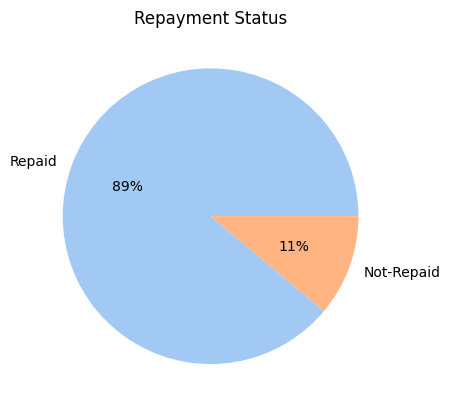

In [ ]:
#Let's visualize the repayment status
labels = ['Repaid', 'Not-Repaid']
counts = df['repayment_status'].value_counts()
colors = sns.color_palette('pastel')[0:2]

plt.pie(counts, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Repayment Status')
plt.show()

SALES ANALYSIS

In [ ]:
df['month_of_sale'] = df['date_of_sale'].dt.to_period('M')
monthly_sales = df.groupby('month_of_sale').size()

print(monthly_sales)


month_of_sale
2021-01    351
2021-02    293
2021-03    271
2021-04    470
2021-05    361
2021-06    254
Freq: M, dtype: int64


SALES BY BRANCH

In [ ]:
#Let's see the total sales in each branch
sales_by_branch = df.groupby('branch')['payment_actual'].sum().reset_index()
print(sales_by_branch)

    branch  payment_actual
0  Bungoma      59234611.0
1   Kisumu      20358714.0
2   Migori      24988220.0
3  Mombasa      18315854.0
4  Nairobi      59496230.0


In [ ]:
# Group by branch to get the sales count per branch
sales_by_branch = df.groupby('branch').size().reset_index(name='sales_count')
print(sales_by_branch)

    branch  sales_count
0  Bungoma          661
1   Kisumu          229
2   Migori          273
3  Mombasa          193
4  Nairobi          644


<ipython-input-67-5b7d5ee5a32f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='branch', y='sales_count', data=sales_by_branch, palette='cool')


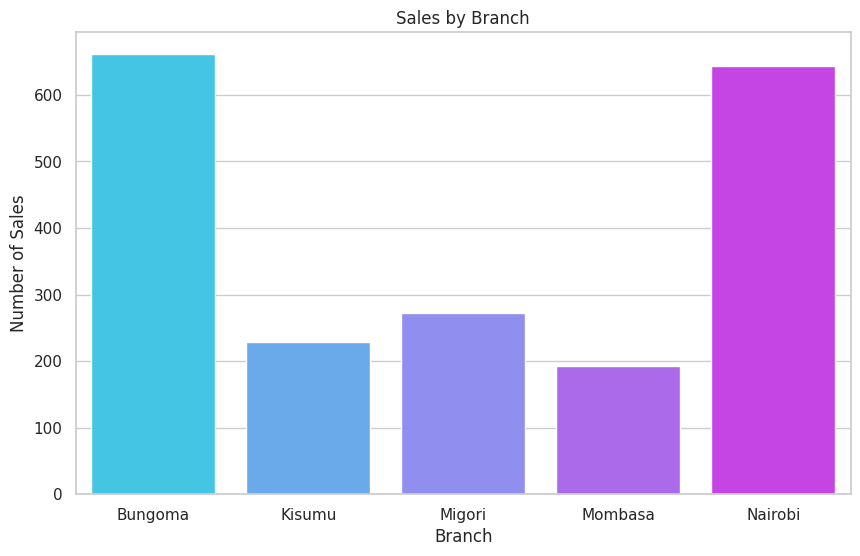

In [ ]:
# Visualizing the sales of each branch
plt.figure(figsize=(10, 6))
sns.barplot(x='branch', y='sales_count', data=sales_by_branch, palette='cool')
plt.title('Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Sales')
plt.show()

MONTHLY SALES TREND

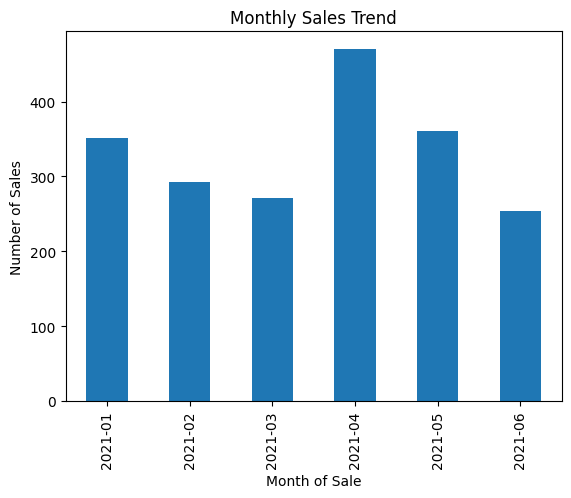

In [ ]:
# Monthly sales trend
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.xlabel('Month of Sale')
plt.ylabel('Number of Sales')
plt.show()

Sales Distribution by Make and Model

In [ ]:
# Group by make and model to get sales count
sales_by_make_model = df.groupby(['make', 'model']).size().reset_index(name='sales_count')
print(sales_by_make_model)# Group by make and model to get sales count

       make                model  sales_count
0     Boxer               BM 100          364
1     Boxer            BM 100 ES            9
2     Boxer               BM 150          384
3     Boxer              BM X125           21
4     Boxer              BM X150           29
5     Boxer               CT 125            7
6   Sonlink               125-A1           22
7   Sonlink               125-A2           26
8   Sonlink               150-KA            7
9   Sonlink               150-KB           10
10  Sonlink               150-KD           41
11  Sonlink               150-KE            1
12  Sonlink               150-M1            6
13  Sonlink             KC 150CC           15
14  Sonlink              SL100-B            4
15  Sonlink            SL150-KDX            6
16  Sonlink           SL200ZH-SC            1
17  Sonlink          SL200ZH-SCW            2
18      TVS         HLX 100CC ES            1
19      TVS    HLX 100CC ES PLUS          144
20      TVS         HLX 100CC KS  

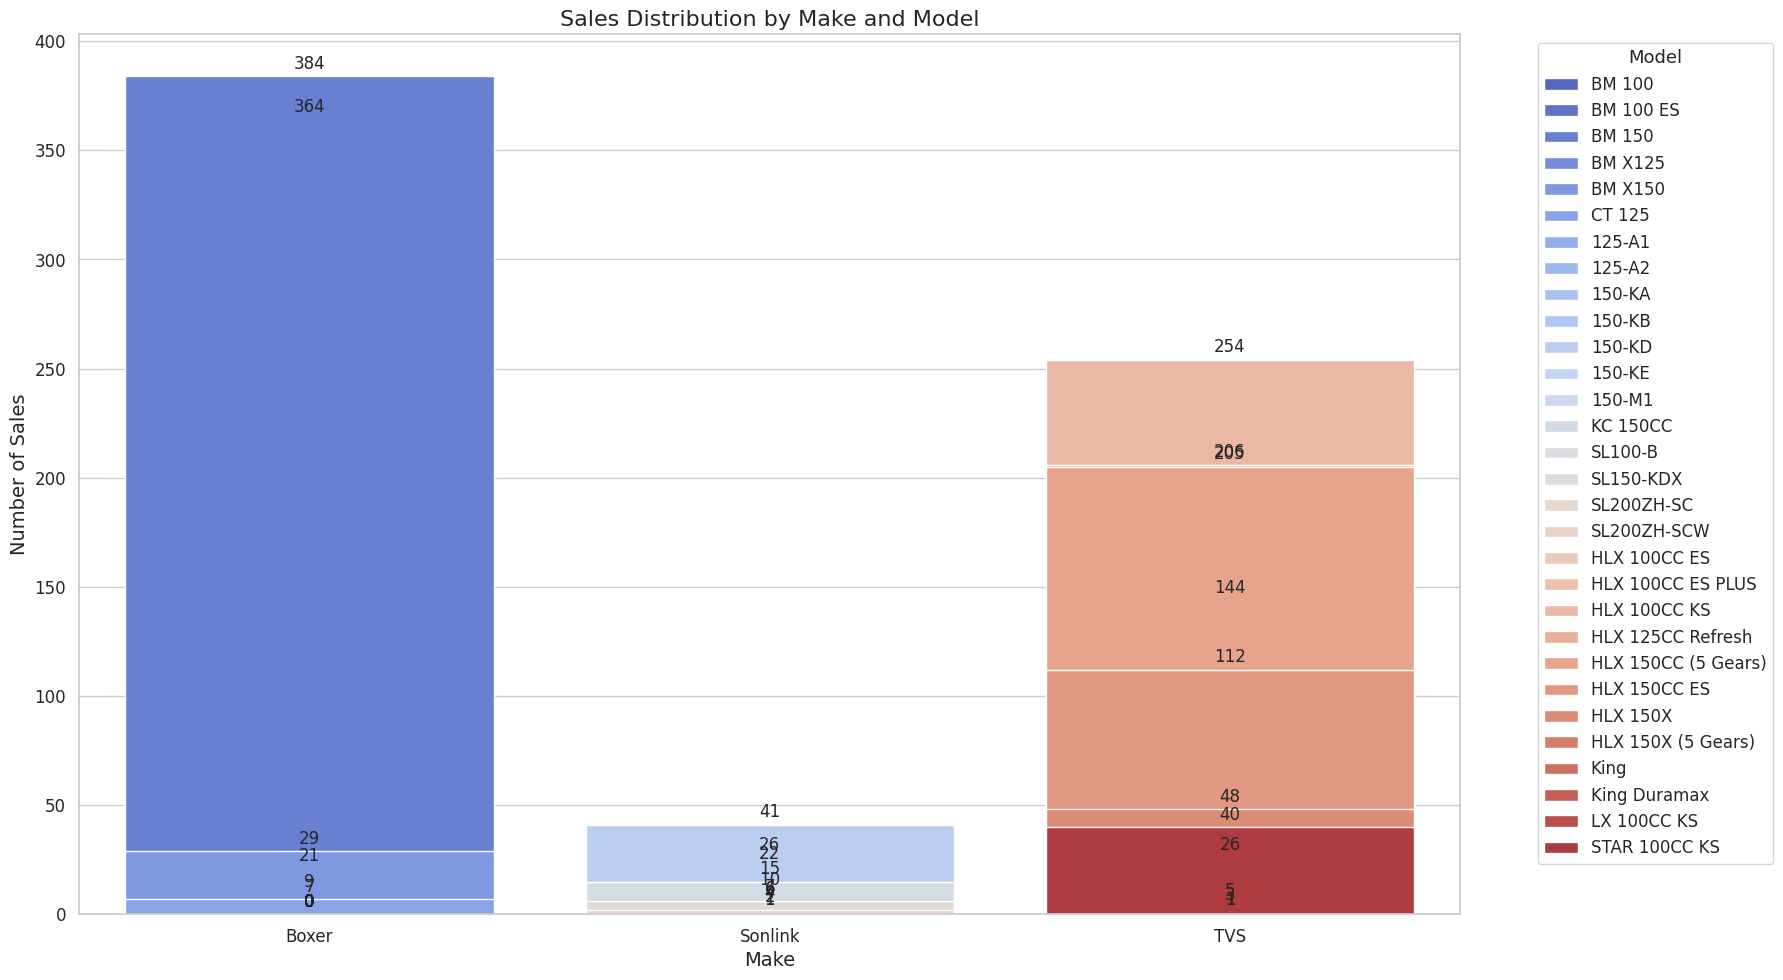

In [ ]:
#let's visualize the sales by make and model
#using large dimensions for a good fit
plt.figure(figsize=(18, 10))
bar_plot = sns.barplot(x='make', y='sales_count', hue='model', data=sales_by_make_model, palette='coolwarm', dodge=False)

# Adding labels above the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

plt.title('Sales Distribution by Make and Model', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

SALES BY REPAYMENT STATUS

In [ ]:
# Group by repayment status to get sales count
sales_by_repayment_status = df.groupby('repayment_status').size().reset_index(name='sales_count')
print(sales_by_repayment_status)

  repayment_status  sales_count
0       not-repaid          222
1           repaid         1778


<ipython-input-91-8164fddcd8c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='repayment_status', y='sales_count', data=sales_by_repayment_status, palette='cool')


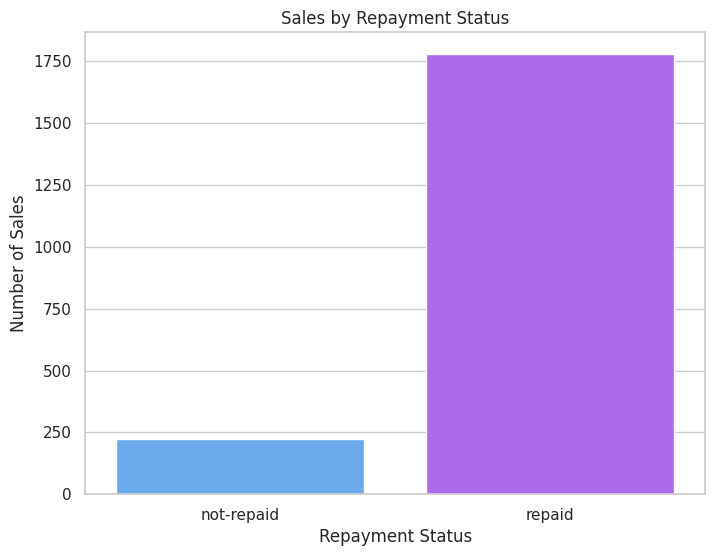

In [91]:
# Visualizing sales by repayment status
plt.figure(figsize=(8, 6))
sns.barplot(x='repayment_status', y='sales_count', data=sales_by_repayment_status, palette='cool')
plt.title('Sales by Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('Number of Sales')
plt.show()

PERCENTAGE CHANGE IN MONTHLY SALES

In [ ]:
#percentage change over time
monthly_sales_pct_change = monthly_sales.pct_change().fillna(0) * 100
print(monthly_sales_pct_change)

month_of_sale
2021-01     0.000000
2021-02   -16.524217
2021-03    -7.508532
2021-04    73.431734
2021-05   -23.191489
2021-06   -29.639889
Freq: M, dtype: float64


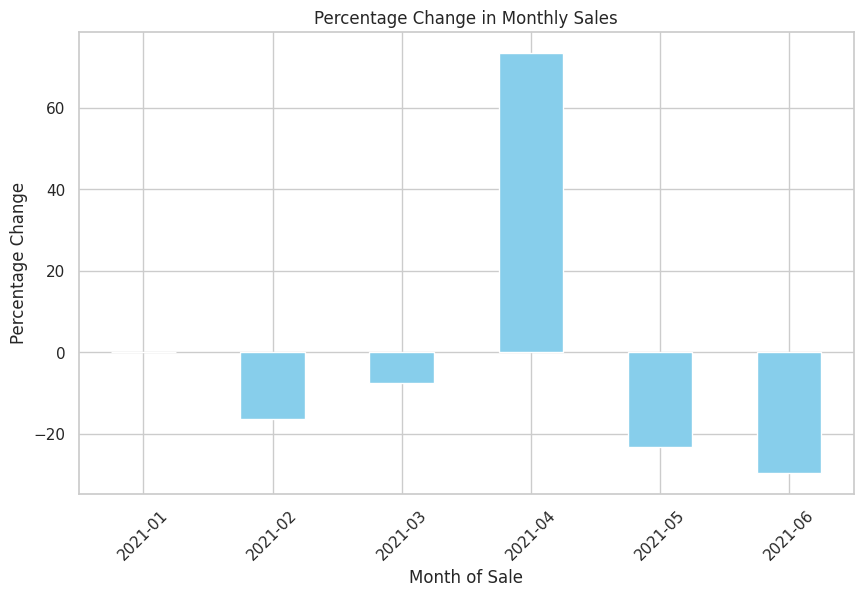

In [ ]:
plt.figure(figsize=(10, 6))
monthly_sales_pct_change.plot(kind='bar', color='skyblue')
plt.title('Percentage Change in Monthly Sales')
plt.xlabel('Month of Sale')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.show()


REPAYMENT ANALYSIS

In [ ]:
sales_summary = df.groupby(['branch', 'repayment_status']).size().unstack(fill_value=0)
print(sales_summary)

repayment_status  not-repaid  repaid
branch                              
Bungoma                   44     617
Kisumu                    18     211
Migori                    28     245
Mombasa                   21     172
Nairobi                  111     533


REPAYMENT STATUS BY BRANCH

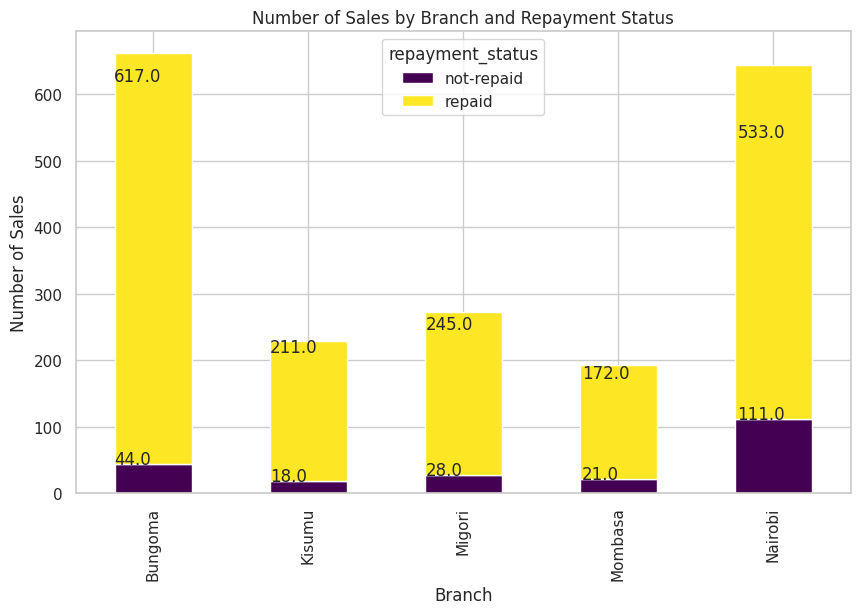

In [ ]:
# calculating the number of sales and repayment status by branch
sales_summary = df.groupby(['branch', 'repayment_status']).size().unstack(fill_value=0)

# Plotting
ax = sales_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Number of Sales by Branch and Repayment Status')
plt.xlabel('Branch')
plt.ylabel('Number of Sales')

# Annotate bars with the respective values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=12)

plt.show()

In [ ]:
payments_by_month = df.groupby('month_of_sale')[['payment_expected', 'payment_actual']].sum()
print(payments_by_month)

               payment_expected  payment_actual
month_of_sale                                  
2021-01              28482015.0      25657998.0
2021-02              25775019.0      23971950.0
2021-03              25255173.0      23772625.0
2021-04              50924320.0      44939069.0
2021-05              40705823.0      35967449.0
2021-06              30320356.0      28084538.0


<Figure size 1000x600 with 0 Axes>

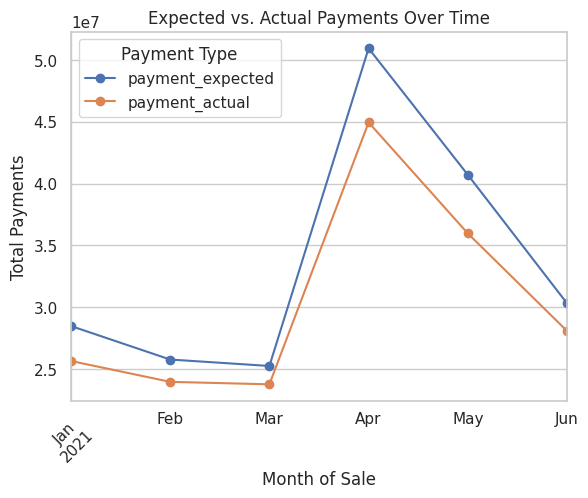

In [ ]:
plt.figure(figsize=(10, 6))
payments_by_month.plot(kind='line', marker='o')
plt.title('Expected vs. Actual Payments Over Time')
plt.xlabel('Month of Sale')
plt.ylabel('Total Payments')
plt.xticks(rotation=45)
plt.legend(title='Payment Type')
plt.show()


REPAYMENT STATUS OVER TIME

<Figure size 1000x600 with 0 Axes>

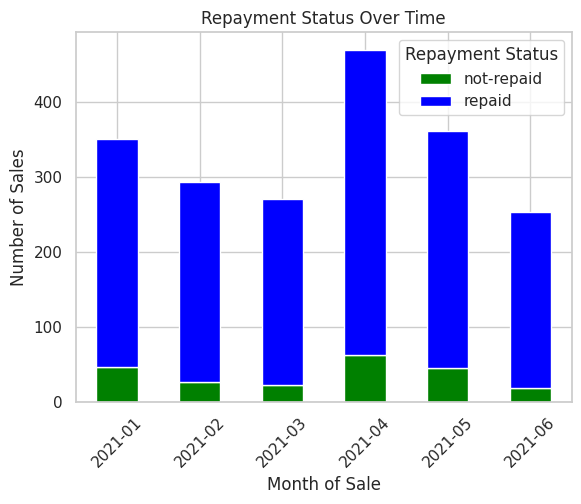

In [ ]:
repayment_by_month = df.groupby(['month_of_sale', 'repayment_status']).size().unstack()

plt.figure(figsize=(10, 6))
repayment_by_month.plot(kind='bar', stacked=True, color=['green', 'blue'])
plt.title('Repayment Status Over Time')
plt.xlabel('Month of Sale')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Repayment Status')
plt.show()


PERCENTAGE CHANGE IN MONTHLY REPAYMENTS

In [ ]:
repayment_by_month_pct_change = repayment_by_month.pct_change().fillna(0) * 100
print(repayment_by_month_pct_change)

repayment_status  not-repaid     repaid
month_of_sale                          
2021-01             0.000000   0.000000
2021-02           -41.304348 -12.786885
2021-03           -18.518519  -6.390977
2021-04           186.363636  63.453815
2021-05           -28.571429 -22.358722
2021-06           -57.777778 -25.632911


<Figure size 1000x600 with 0 Axes>

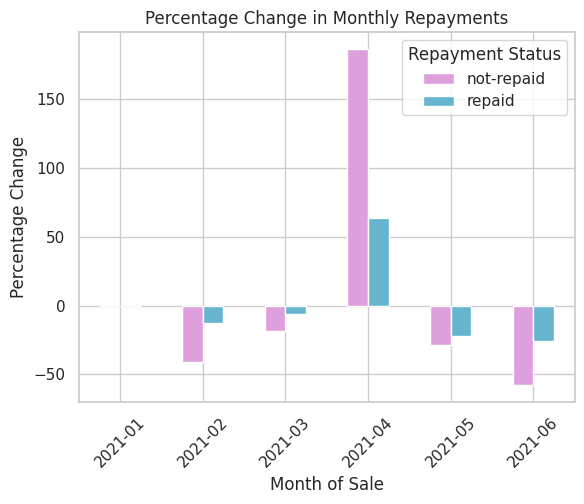

In [ ]:
plt.figure(figsize=(10, 6))
repayment_by_month_pct_change.plot(kind='bar', stacked=False, color=['plum', 'c'])
plt.title('Percentage Change in Monthly Repayments')
plt.xlabel('Month of Sale')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.legend(title='Repayment Status')
plt.show()
